#### DMG Home Work Assignment 

#### Name : Samartha Siddhartha
#### ISBID : 11910065

### PART 1

In [ ]:
import os 
os.chdir("G:\\ISBHyderabad\\Campus6\\DMG2\\Assigment")

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
iris_train = pd.read_csv("train.csv")

In [24]:
iris_train.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4,4.6,3.1,1.5,0.2,setosa
1,7,4.6,3.4,1.4,0.3,setosa
2,12,4.8,3.4,1.6,0.2,setosa
3,13,4.8,3.0,1.4,0.1,setosa
4,15,5.8,4.0,1.2,0.2,setosa


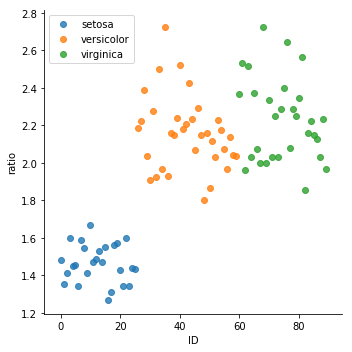

In [25]:
iris_train["ID"] = iris_train.index
iris_train["ratio"] = iris_train["Sepal.Length"]/iris_train["Sepal.Width"]

sns.lmplot(x="ID", y="ratio", data=iris_train, hue="Species", fit_reg=False, legend=False)

plt.legend()
plt.show()

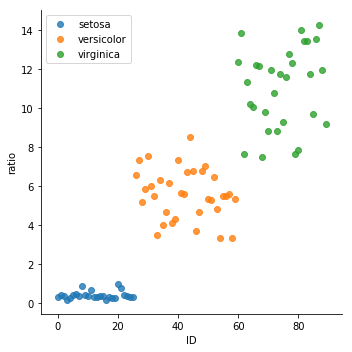

In [26]:
iris_train["ID"] = iris_train.index
iris_train["ratio"] = iris_train["Petal.Length"]*iris_train["Petal.Width"]

sns.lmplot(x="ID", y="ratio", data=iris_train, hue="Species", fit_reg=False, legend=False)

plt.legend()
plt.show()

#### Versicolor & Virginica are close 

In [110]:
iris_train = pd.read_csv("train.csv")

In [111]:
iris_train.loc[iris_train.Species =="versicolor", 'Species'] = 3
iris_train.loc[iris_train.Species =="virginica", 'Species'] = 3
iris_train.loc[iris_train.Species =="setosa", 'Species'] = 4
iris_train.Species.value_counts()

3    64
4    26
Name: Species, dtype: int64

In [112]:
X_iris = iris_train.drop(columns="Species",axis=1)
X_iris.shape

(90, 5)

In [113]:
y_iris = iris_train["Species"]

In [153]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# Plot functions
def plot_data(lda, X, y, y_pred, fig_index,a,b):
    splot = plt.subplot(2, 2, fig_index)
    plt.title('Linear Discriminant Analysis')
  

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 3], tp[y == 4]
    X0, X1 = X[y == 3], X[y == 4]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


In [137]:
iris_test = pd.read_csv("test.csv")
iris_test.loc[iris_test.Species =="versicolor", 'Species'] = 3
iris_test.loc[iris_test.Species =="virginica", 'Species'] = 3
iris_test.loc[iris_test.Species =="setosa", 'Species'] = 4
iris_test.Species.value_counts()

3    36
4    24
Name: Species, dtype: int64

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


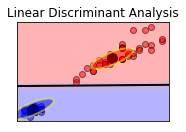

In [146]:
def dataset_petal():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    X = np.r_[X_iris[["Petal.Width","Petal.Length"]]]
    y = np.r_[y_iris]
    
    return X, y

for i, (X, y) in enumerate([ dataset_petal()]):
    x_test = np.r_[iris_test[["Petal.Width","Petal.Length"]]]
    y_test =np.r_[iris_test["Species"]]
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(x_test)               
    splot = plot_data(lda, x_test, y_test, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

In [142]:
np.r_[iris_test["Species"]]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

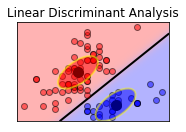

In [148]:
def dataset_sepal():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    X = np.r_[X_iris[["Sepal.Width","Sepal.Length"]]]
    y = np.r_[y_iris]
    return X, y

for i, (X, y) in enumerate([ dataset_sepal()]):
    x_test = np.r_[iris_test[["Sepal.Width","Sepal.Length"]]]
    y_test =np.r_[iris_test["Species"]]
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

In [150]:
iris_train = pd.read_csv("train.csv")
iris_train = iris_train[iris_train.Species != "setosa"]
iris_train.Species.value_counts()


versicolor    34
virginica     30
Name: Species, dtype: int64

In [151]:
iris_train.loc[iris_train.Species =="versicolor", 'Species'] = 0
iris_train.loc[iris_train.Species =="virginica", 'Species'] = 1

In [159]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    plt.title('Linear Discriminant Analysis')
  

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


In [155]:
iris_test = pd.read_csv("test.csv")
iris_test = iris_test[iris_test.Species != "setosa"]

iris_test.loc[iris_test.Species =="versicolor", 'Species'] = 0
iris_test.loc[iris_test.Species =="virginica", 'Species'] = 1
iris_test.Species.value_counts()

1    20
0    16
Name: Species, dtype: int64

G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


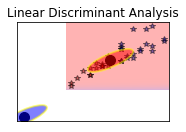

In [160]:
def dataset_petal():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    X = np.r_[X_iris[["Petal.Width","Petal.Length"]]]
    y = np.r_[y_iris]
    
    return X, y

for i, (X, y) in enumerate([ dataset_petal()]):
    x_test = np.r_[iris_test[["Petal.Width","Petal.Length"]]]
    y_test =np.r_[iris_test["Species"]]
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(x_test)               
    splot = plot_data(lda, x_test, y_test, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


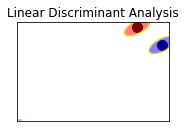

In [183]:
def dataset_sepal():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    X = np.r_[X_iris[["Sepal.Width","Sepal.Length"]]]
    y = np.r_[y_iris]
    return X, y

for i, (X, y) in enumerate([ dataset_sepal()]):
    x_test = np.r_[iris_test[["Sepal.Width","Sepal.Length"]]]
    y_test =np.r_[iris_test["Species"]]
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

### PART 2


In [184]:
import os
os.chdir("G:\\ISBHyderabad\\Campus6\\DMG2\\Mushroom")

In [250]:
mushroom_train = pd.read_csv("train.csv")

In [186]:
mushroom_train.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,7,e,b,s,w,t,a,f,c,b,...,s,w,w,p,w,o,p,k,n,m
2,12,e,x,y,y,t,a,f,c,b,...,s,w,w,p,w,o,p,k,s,m
3,13,e,b,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,s,g
4,15,e,x,f,n,f,n,f,w,b,...,f,w,w,p,w,o,e,k,a,g


In [204]:
mushroom_train.V1.value_counts()
mushroom_train.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23'],
      dtype='object')

In [251]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in mushroom_train.columns:
    mushroom_train[column] = labelencoder.fit_transform(mushroom_train[column])

In [252]:
X_train = mushroom_train.drop(columns=["V1",'Unnamed: 0'],axis=1)
y_train = mushroom_train["V1"]

In [219]:
from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3,)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=3,)
clf_acc = DecisionTreeClassifier(criterion = "accuracy", 
            random_state = 100,max_depth=3, min_samples_leaf=5)


In [232]:
clf_gini.fit(X_train,y_train)
m = dict(zip(X_train.columns, clf_gini.feature_importances_))


In [244]:
clf_entropy.fit(X_train,y_train)
k = dict(zip(X_train.columns, 1-clf_entropy.feature_importances_))


In [245]:
pd.DataFrame({"Featur_Name":list(k.keys()),"Gini_Index":list(m.values()),"Entropy":list(k.values())})

,Featur_Name,Gini_Index,Entropy
0,V2,0.000000,1.000000
1,V3,0.000000,1.000000
2,V4,0.000000,1.000000
3,V5,0.000000,1.000000
4,V6,0.047879,0.908066
5,V7,0.000000,1.000000
6,V8,0.000000,1.000000
7,V9,0.123758,0.834843
8,V10,0.390310,0.681580
9,V11,0.000000,1.000000


### PART 3

In [258]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [253]:
mushroom_test = pd.read_csv("test.csv")

In [254]:
labelencoder=LabelEncoder()
for column in mushroom_test.columns:
    mushroom_test[column] = labelencoder.fit_transform(mushroom_test[column])

In [255]:
X_test = mushroom_test.drop(columns=["V1",'Unnamed: 0'],axis=1)
y_test = mushroom_test["V1"]

In [280]:
gnb1 = MultinomialNB()
gnb1.fit(X_train,y_train)
y_pred = gnb1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(gnb1.score(X_test,y_test))

[[1610   80]
 [ 454 1091]]
0.8349304482225657


In [283]:
accuracy_score ={}
for lapa in range(1,51):
    gnb1 = MultinomialNB(alpha=lapa)
    gnb1.fit(X_train,y_train)
    y_pred = gnb1.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
    accuracy_score[lapa] = (gnb1.score(X_test,y_test))
    

In [281]:
accuracy_dsc ={}
for sample in [k for k in range(1,65) if k%4 ==0]:
    Dsc = DecisionTreeClassifier(max_leaf_nodes=sample)
    Dsc.fit(X_train,y_train)
    y_pred = Dsc.predict(X_test)
    accuracy_dsc[sample] = Dsc.score(X_test,y_test)

# DecisionTreeClassifier()

In [282]:
accuracy_dsc

{4: 0.915919629057187,
 8: 0.9731066460587326,
 12: 0.9901081916537867,
 16: 0.9950540958268933,
 20: 1.0,
 24: 1.0,
 28: 1.0,
 32: 1.0,
 36: 1.0,
 40: 1.0,
 44: 1.0,
 48: 1.0,
 52: 1.0,
 56: 1.0,
 60: 1.0,
 64: 1.0}

### PART 4


In [284]:
import os 
os.chdir("G:\\ISBHyderabad\\Campus6\\DMG2\\Mnist")

In [289]:
mnist_train = pd.read_csv("train0.csv")
# print(mnist_train.shape)
for rn in range(1,10):
    filename = "train"+str(rn)+".csv"
#     print(filename)
    dat = pd.read_csv(filename)
    mnist_train = mnist_train.append(dat)
#     print(mnist_train.shape)
mnist_train.shape

G:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(36700, 785)

In [290]:
mnist_test = pd.read_csv("test0.csv")
# print(mnist_train.shape)
for rn in range(1,10):
    filename = "test"+str(rn)+".csv"
#     print(filename)
    dat = pd.read_csv(filename)
    mnist_test = mnist_test.append(dat)
#     print(mnist_train.shape)
mnist_test.shape

G:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(23960, 785)

In [292]:
mnist_train.to_csv("master.csv",index=None)

In [299]:
mnist_train =mnist_train.rename(index=str, columns={'Unnamed: 0': "target"})


In [297]:
mnist_train.columns[0]

'Unnamed: 0'

In [302]:
mnist_train.target.isna().value_counts()

False    36696
True         4
Name: target, dtype: int64

In [303]:
mnist_train.shape
mnist_train = mnist_train.dropna()
mnist_train.shape

(36286, 785)

In [304]:
from sklearn.preprocessing import StandardScaler
features = mnist_train.columns[1:]
x = mnist_train.loc[:, features].values
# Separating out the target
y = mnist_train.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [310]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
D0= pd.DataFrame(data = principalComponents
             , columns = ["principal_component_"+str(k) for k in range(1,10) ])

In [378]:
D0.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9
0,5.926297,-7.552302,-2.210556,-0.000665,-4.839182,-0.424888,0.378214,6.664077,2.930316
1,12.920559,-7.727640,-4.290785,-7.550361,-0.074392,-1.712971,-0.456940,1.831160,0.673389
2,13.458245,4.206736,1.870155,-2.932728,3.332874,-4.454390,-4.461932,-3.065174,-3.760532
3,6.622892,-5.315292,-1.730104,-3.542029,-8.323085,-2.636027,-1.642249,3.997412,-0.100855
4,20.189658,-0.406177,-7.757121,-0.067839,11.703325,-8.875343,-5.635530,-1.087366,2.960485


In [359]:
x_train = np.r_[mnist_train.drop(columns="target",axis=1)] 
y_train = np.asarray(mnist_train["target"],dtype=np.float32)

In [328]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda  = LinearDiscriminantAnalysis(n_components=9)
D1 = lda.fit(x_train, y_train).transform(x_train)


G:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [351]:
D1 = pd.DataFrame(D1)

In [379]:
D1.head()

,0,1,2,3,4,5,6,7,8
0,0.036407,0.045349,-0.068198,-0.198623,-0.330088,0.405797,-0.580191,0.931176,-1.085196
1,0.104156,0.063427,0.351228,0.945171,0.218504,0.591686,-0.135179,-1.361148,-1.118623
2,-0.107272,0.122394,-0.319237,-0.261317,0.230587,0.532803,0.035543,0.772466,0.406130
3,0.089141,0.046835,-0.082643,-0.022239,0.170896,0.572286,1.017736,0.959394,-0.195002
4,0.085726,-0.062020,0.300478,-0.834084,-0.167590,0.286470,0.185214,0.200083,-0.966069


In [342]:
mnist_test =mnist_test.rename(index=str, columns={'Unnamed: 0': "target"})
mnist_test =mnist_test.dropna()

In [343]:
from sklearn.preprocessing import StandardScaler
features = mnist_test.columns[1:]
x = mnist_test.loc[:, features].values
# Separating out the target
y = mnist_test.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [344]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
D0_test = pd.DataFrame(data = principalComponents
             , columns = ["principal_component_"+str(k) for k in range(1,10) ])

In [345]:
y_test= np.asarray(mnist_test["target"],dtype=np.float32)

In [360]:

gnb1 = GaussianNB()
gnb1.fit(D0,y_train)
y_pred = gnb1.predict(D0_test)
# print(confusion_matrix(y_test, y_pred))
print(gnb1.score(D0,y_train))

0.01584633191864631


In [354]:
gnb1 = GaussianNB()
gnb1.fit(D1,y_train)
# y_pred = gnb1.predict(D0_test)
# print(confusion_matrix(y_test, y_pred))
print(gnb1.score(D1,y_train))

0.029239927244667365


### PART 5 

In [365]:
label = np.array(mnist_train["target"],dtype=np.float64)

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn_accuracy = {}
for neig in [k for k in range(1,18) if k%2!=0]:
    print(neig)
    model = KNeighborsClassifier(n_neighbors=neig)
    model.fit(D0,label)
    knn_accuracy[neig] = model.score(D0,label)

1
3
5
7
9
11
13
15
17


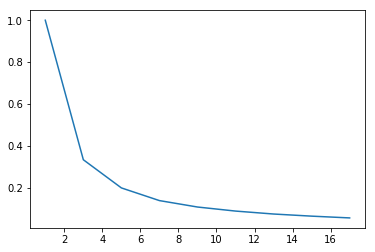

In [372]:
plt.plot(list(knn_accuracy.keys()),list(knn_accuracy.values()))

In [381]:
from sklearn.neighbors import KNeighborsClassifier
knn_accuracy = {}
for neig in [k for k in range(1,18) if k%2!=0]:
    print(neig)
    model = KNeighborsClassifier(n_neighbors=neig)
    model.fit(D1,label)
    knn_accuracy[neig] = model.score(D1,label)

1
3
5
7
9
11
13
15
17


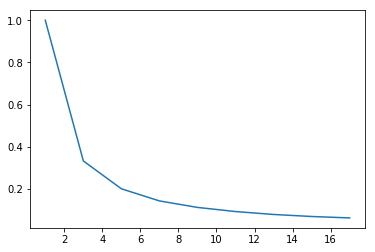

In [382]:
plt.plot(list(knn_accuracy.keys()),list(knn_accuracy.values()))

In [380]:
from sklearn.neighbors import KernelDensity
parzen_accuracy ={}
for sigma in range(1,31):
#     print(parzon/100)
    model =KernelDensity(bandwidth=sigma/100)
#     model = KNeighborsClassifier(n_neighbors=neig)
    model.fit(D0,label)
    parzen_accuracy[sigma] = model.score(D0,label)
#     knn_accuracy[neig] = model.score(D0,label)

KeyboardInterrupt: 

### PART 6

In [383]:
from os import listdir
from os.path import isfile, join
import string

In [384]:
os.chdir("G:\\ISBHyderabad\\Campus6\\DMG2\\Newsgroup")

In [385]:
my_path = '20_newsgroups'

#creating a list of folder names to make valid pathnames later
folders = [f for f in listdir(my_path)]

In [387]:
file = []
for foldername in folders:
    folder_path = join(my_path, foldername)
    file.append([f for f in listdir(folder_path)])

In [388]:
Y = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [390]:
X_train, X_test, Y_train, Y_test = train_test_split(pathname_list, Y, random_state=0, test_size=0.25)


In [391]:
def preprocess(words):

    
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "") 
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    words = [str for str in stripped_words if str]
    
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()      
    words = [word for word in words if not word.isdigit()]
    words = [word for word in words if not len(word) == 1]
    words = [str for str in words if str]
    words = [word.lower() for word in words]
    words = [word for word in words if len(word) > 2]
    
    return words

In [402]:
def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = preprocess(words)    
    return words

In [399]:
def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:]
    return new_lines

In [394]:
def tokenize(path):
    f = open(path, 'r')
    text_lines = f.readlines()
    text_lines = remove_metadata(text_lines)
    doc_words = []
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))

    return doc_words

In [403]:
word_list =[]
for wrds in X_train:
    word_list.append(tokenize(wrds))

In [412]:

word_list_d = []
for doc in word_list:
    for line in doc:
        for wrd in line:
            word_list_d.append(wrd)
    


In [414]:
from collections import Counter
cnts = Counter(word_list_d)


In [420]:
X_news_train = list(cnts.values())
y_news_train = list(cnts.keys())

In [421]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_news_train, y_news_train)

ValueError: Expected 2D array, got 1D array instead:
array=[9395    3    4 ...    1    1    1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [423]:
cnts

Counter({'article': 9395,
         '1r11184vsterminatorrsitdumichedu': 3,
         'jloveivritraitdumichedu': 4,
         'jack': 263,
         'love': 920,
         'writes': 10997,
         'faced': 64,
         'the': 186626,
         'branch': 286,
         'davidians': 218,
         'latter': 166,
         'reality': 399,
         'would': 11846,
         'likely': 737,
         'have': 23615,
         'been': 5915,
         'charged': 81,
         'with': 21971,
         'weapons': 537,
         'violations': 71,
         'and': 73110,
         'other': 6610,
         'sorts': 133,
         'crimes': 164,
         'most': 3537,
         'them': 6463,
         'gotten': 224,
         'off': 2308,
         'entirely': 279,
         'highly': 257,
         'unlikely': 154,
         'that': 50311,
         'anyone': 3236,
         'than': 6206,
         'vernon': 38,
         'howell': 32,
         'imprisoned': 20,
         'for': 34875,
         'very': 4002,
         'long': 1720,